In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits() # number images data
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

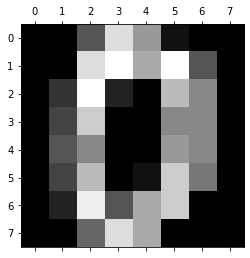

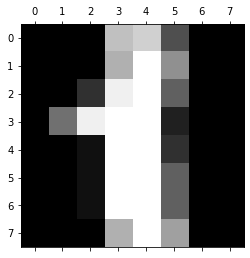

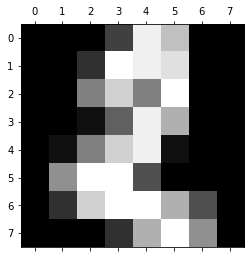

In [2]:
plt.gray()
for i in range(3):
    plt.matshow(digits.images[i])

In [3]:
df = pd.DataFrame(digits.data)
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'),df['target'],test_size=0.25)

In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)
model.predict(X_test)

array([2, 7, 2, 2, 5, 8, 4, 9, 7, 4, 2, 0, 5, 4, 3, 3, 0, 7, 0, 4, 5, 9,
       4, 2, 5, 9, 6, 0, 5, 6, 9, 0, 1, 4, 2, 4, 8, 5, 9, 4, 2, 5, 6, 7,
       6, 5, 9, 1, 5, 5, 3, 3, 7, 4, 5, 7, 4, 5, 7, 1, 8, 3, 6, 6, 7, 5,
       1, 8, 4, 4, 5, 5, 4, 5, 8, 5, 6, 7, 7, 9, 7, 0, 2, 2, 8, 6, 4, 7,
       2, 6, 5, 9, 8, 3, 9, 5, 8, 6, 5, 8, 3, 5, 9, 4, 0, 8, 5, 8, 9, 6,
       6, 8, 5, 6, 4, 7, 5, 1, 9, 0, 2, 6, 5, 1, 6, 3, 2, 9, 6, 8, 4, 3,
       9, 0, 3, 7, 5, 0, 0, 5, 9, 2, 7, 4, 7, 6, 6, 0, 4, 1, 9, 8, 8, 5,
       9, 3, 1, 3, 4, 9, 4, 0, 4, 6, 9, 1, 4, 7, 2, 2, 8, 3, 1, 4, 6, 0,
       4, 7, 8, 5, 3, 1, 7, 0, 9, 6, 3, 1, 7, 0, 7, 2, 4, 6, 5, 9, 2, 5,
       2, 7, 1, 5, 2, 3, 8, 5, 0, 0, 4, 4, 7, 4, 8, 0, 1, 6, 4, 3, 7, 1,
       4, 7, 0, 8, 3, 8, 3, 9, 1, 6, 0, 6, 1, 8, 6, 1, 5, 7, 1, 5, 5, 2,
       3, 2, 5, 2, 7, 9, 7, 9, 6, 0, 0, 2, 5, 1, 8, 4, 4, 4, 0, 2, 8, 1,
       6, 0, 1, 8, 4, 9, 7, 9, 5, 8, 4, 8, 7, 3, 7, 7, 1, 1, 0, 2, 8, 0,
       9, 0, 9, 7, 0, 4, 6, 2, 9, 9, 1, 4, 7, 6, 3,

In [8]:
model.score(X_test,y_test)

0.9711111111111111

Text(69.0, 0.5, 'Truth')

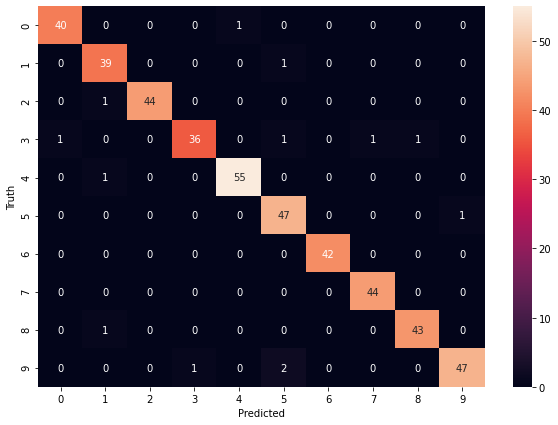

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(X_test))
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')